<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
Dataset Overview:
 None

Missing Values Count:
 Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

Percentage of Missing Values:
 Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000

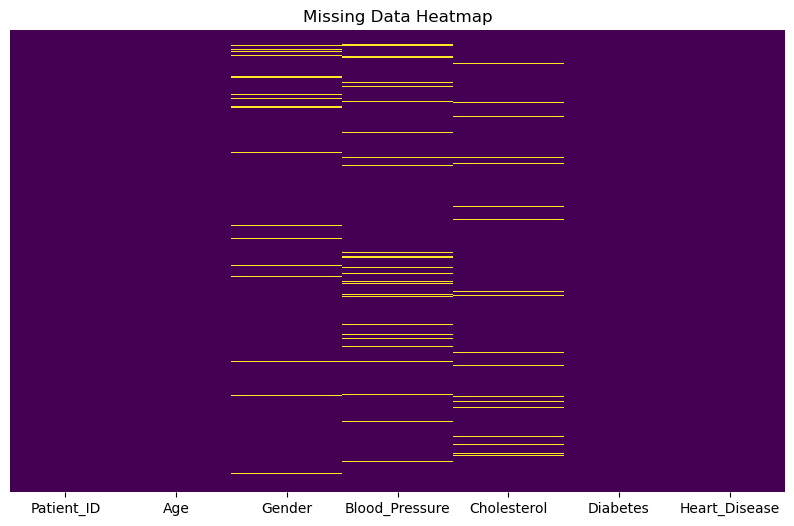

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Load the dataset
df = pd.read_csv("Day_15_Healthcare_Data.csv")

# Initial Exploratory Data Analysis (EDA)
print("Dataset Overview:\n", df.info())
print("\nMissing Values Count:\n", df.isna().sum())

# Calculate missing value percentages
missing_percentage = (df.isna().sum() / len(df)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)

# Visualize missing data pattern
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    float64
 1   Age             505 non-null    float64
 2   Gender          505 non-null    object 
 3   Blood_Pressure  505 non-null    float64
 4   Cholesterol     505 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(4), object(3)
memory usage: 27.7+ KB

Dataset After Imputation:
 None


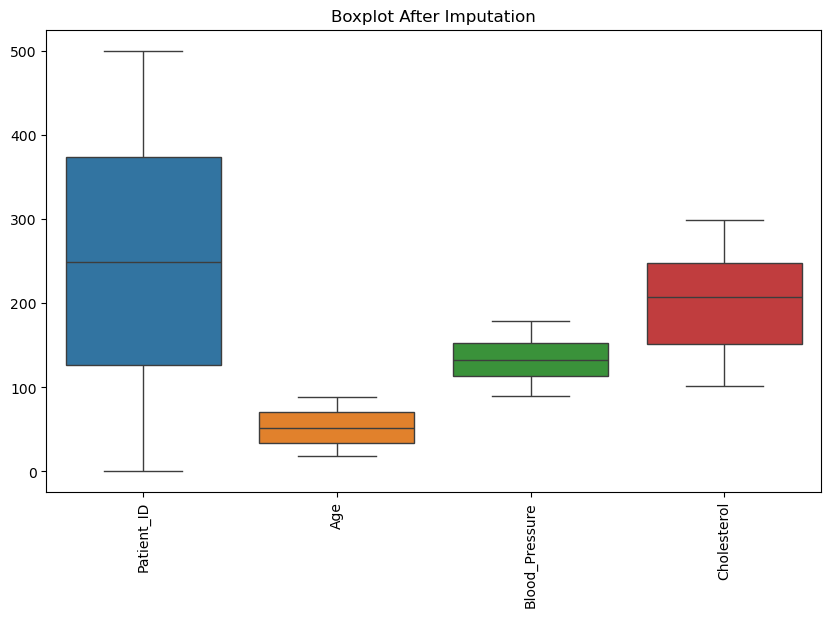

Data Cleaning Completed and Saved as Cleaned_Healthcare_Data.csv


In [4]:
# Impute Missing Values
# Mean/Median/Mode Imputation
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df[df.select_dtypes(include=['number']).columns] = knn_imputer.fit_transform(df.select_dtypes(include=['number']))

# Evaluate Effects of Imputation
print("\nDataset After Imputation:\n", df.info())

# Visualize changes using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Boxplot After Imputation")
plt.show()

# Save cleaned dataset
df.to_csv("Cleaned_Healthcare_Data.csv", index=False)

print("Data Cleaning Completed and Saved as Cleaned_Healthcare_Data.csv")